### Importing Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("processed.csv")

In [ ]:
BU = df['BUSINESS_UNIT'].unique()
MARKET = df['PARTNER_MARKET'].unique()

### Time - Forecasting using ARIMA:

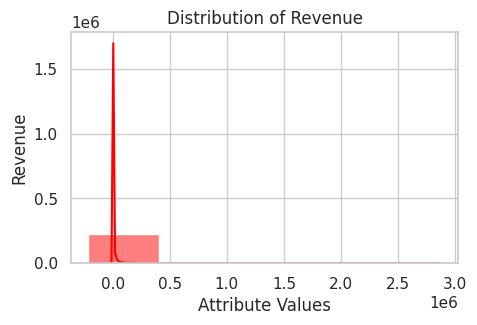

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='REVENUE_USD', kde=True, bins=5, color='red')
plt.title('Distribution of Revenue')
plt.xlabel('Attribute Values')
plt.ylabel('Revenue')
plt.show()

In [ ]:
mean_value = df['REVENUE_USD'].mean()
median_value = df['REVENUE_USD'].median()
print(f"Mean: {mean_value}, Median: {median_value}")

Mean: 2588.832444981861, Median: 161.42


In [ ]:
df['REVENUE_USD'].fillna(median_value, inplace=True)

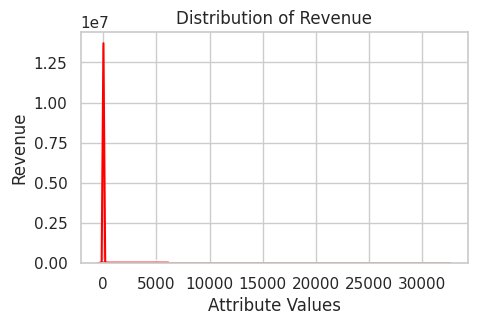

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='UNITS', kde=True, bins=5, color='red')
plt.title('Distribution of Revenue')
plt.xlabel('Attribute Values')
plt.ylabel('Revenue')
plt.show()

In [ ]:
mean_value = df['UNITS'].mean()
median_value = df['UNITS'].median()
print(f"Mean: {mean_value}, Median: {median_value}")

Mean: 20.640241643098022, Median: 2.0


In [ ]:
df['UNITS'].fillna(median_value, inplace=True)

In [ ]:
df.isna().sum()

,0
DATA_FROM,0
BUSINESS_UNIT,0
PARTNER_MARKET,0
PRODUCT_CATEGORY,0
PARTNER_HQ_NAME,0
PARTNER_ID,0
PARTNER_CUSTOMER_ID,26874
PARTNER_LEVEL,0
IS_OPSI,0
ONLINE_FLAG,84813


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
def arima_func(dataframe):
  df2 = dataframe[['DATE','UNITS','REVENUE_USD']]
  df2.set_index('DATE', inplace=True)
  freq = 'D'  # Daily frequency
  df_re = df2.resample(freq).agg({'UNITS': 'sum', 'REVENUE_USD': 'sum'})
  df_re.replace(0, np.nan, inplace=True)
  df_re['UNITS'].interpolate(method='linear', inplace=True)
  df_re['REVENUE_USD'].interpolate(method='linear', inplace=True)
  train_size = int(0.75 * len(df_re))
  train, test = df_re.iloc[:train_size], df_re.iloc[train_size:]
  # Forecast future demand
  ord = (5, 1, 0)
  model = ARIMA(train['UNITS'], order=ord)
  model_fit = model.fit()
  forecast_steps = len(test)
  forecast = model_fit.forecast(steps=forecast_steps)
  plt.figure(figsize=(6, 3))
  plt.plot(train.index, train['UNITS'], label='Train Data')
  plt.plot(test.index, test['UNITS'], label='Test Data')
  plt.plot(test.index, forecast, label='Forecast')
  plt.xlabel('Date')
  plt.ylabel('Units')
  plt.title('ARIMA Forecast for Units')
  plt.legend()
  plt.show()
  mape = mean_absolute_percentage_error(test['UNITS'], forecast)
  print(f"Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: {mape:.2f}%")
  # Forecast future Revenue
  ord = (5, 1, 0)
  model = ARIMA(train['REVENUE_USD'], order=ord)
  model_fit = model.fit()
  forecast_steps = len(test)
  forecast = model_fit.forecast(steps=forecast_steps)
  plt.figure(figsize=(6, 3))
  plt.plot(train.index, train['REVENUE_USD'], label='Train Data')
  plt.plot(test.index, test['REVENUE_USD'], label='Test Data')
  plt.plot(test.index, forecast, label='Forecast')
  plt.xlabel('Date')
  plt.ylabel('Revenue')
  plt.title('ARIMA Forecast for Revenue')
  plt.legend()
  plt.show()
  mape = mean_absolute_percentage_error(test['REVENUE_USD'], forecast)
  print(f"Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: {mape:.2f}%")

#### BU:


--------------------FOR THE BUSINESS UNIT: Printing Supplies ----------------------------


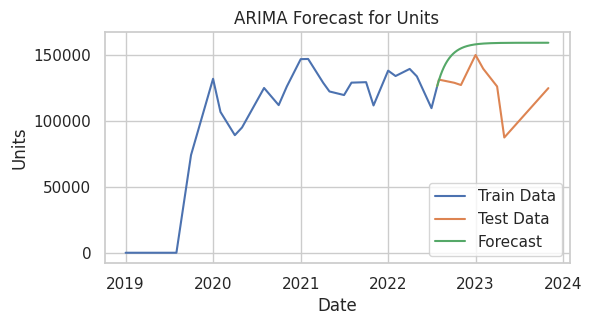

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.31%


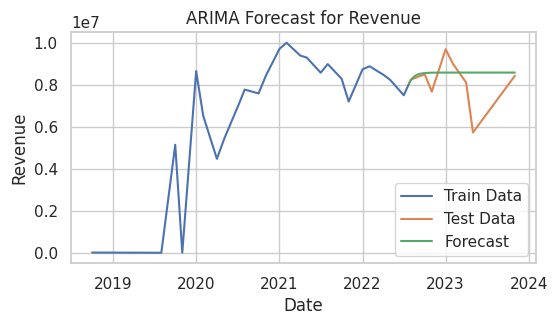

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.13%

--------------------FOR THE BUSINESS UNIT: Printing HW ----------------------------


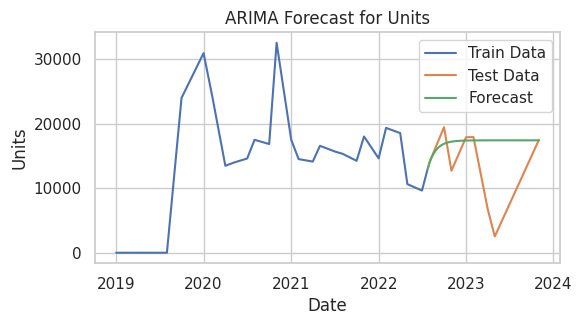

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.79%


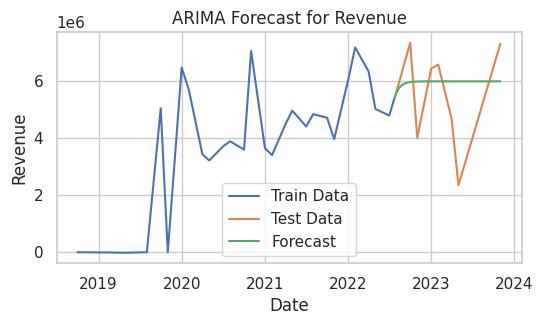

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.28%

--------------------FOR THE BUSINESS UNIT: Computing ----------------------------


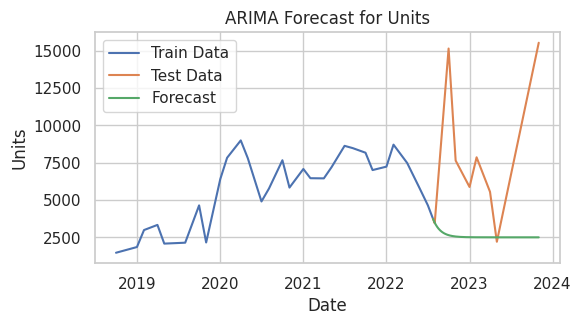

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.61%


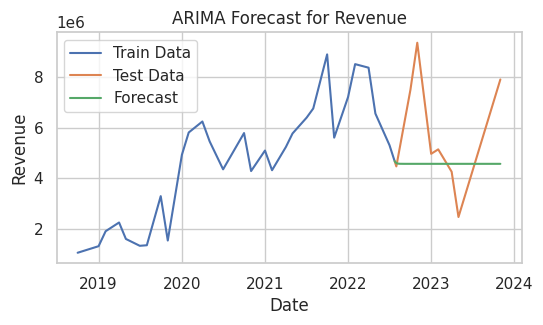

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.25%


In [ ]:
for i in BU:
  print('')
  print('--------------------FOR THE BUSINESS UNIT:', i, '----------------------------')
  dft = df[df['BUSINESS_UNIT'] == i]
  arima_func(dft)

#### MARKET:


--------------------FOR THE PARTNER MARKET: North America ----------------------------


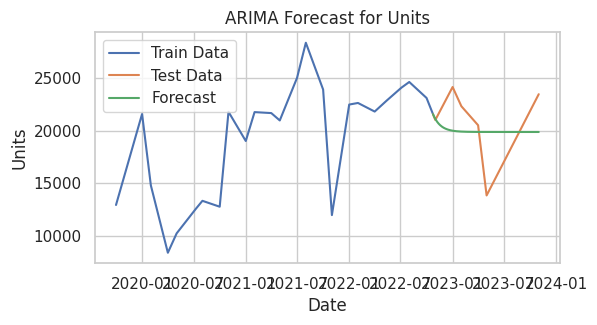

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.13%


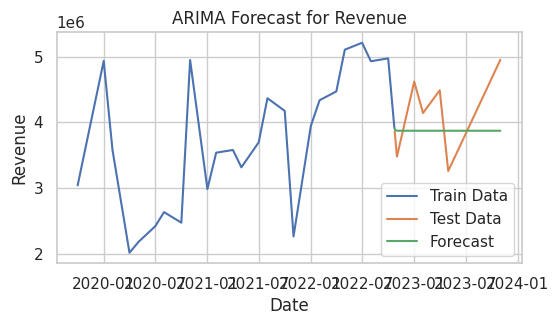

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.10%

--------------------FOR THE PARTNER MARKET: Latin America ----------------------------


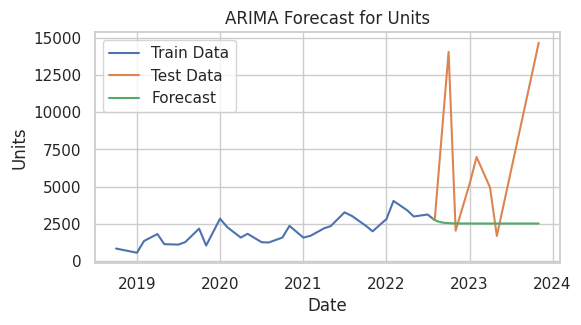

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.53%


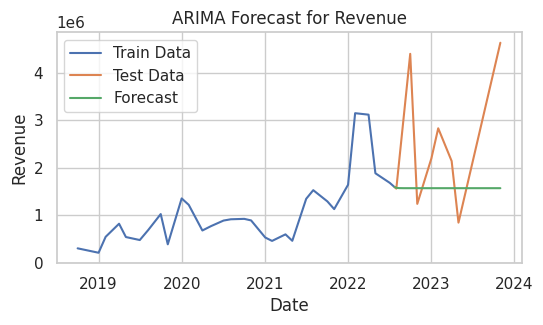

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.36%

--------------------FOR THE PARTNER MARKET: Greater Asia ----------------------------


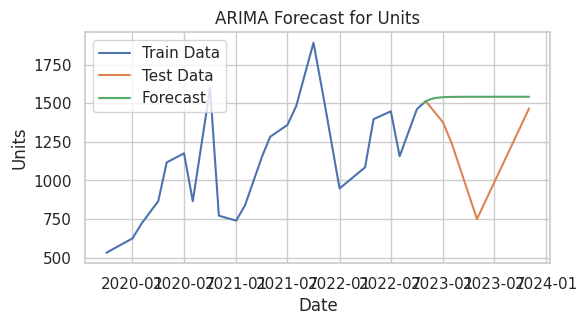

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.38%


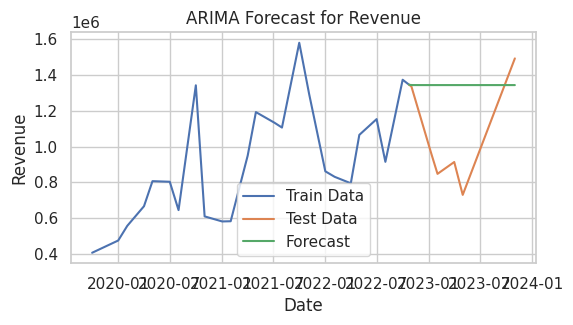

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.33%

--------------------FOR THE PARTNER MARKET: India ----------------------------


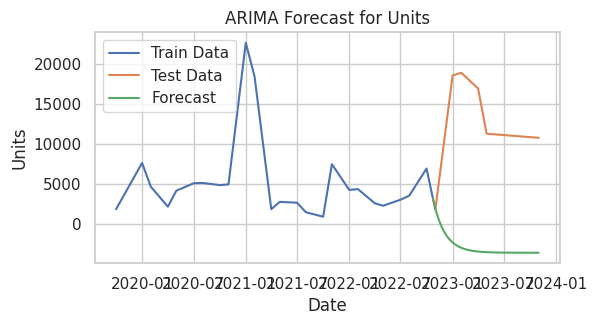

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 1.20%


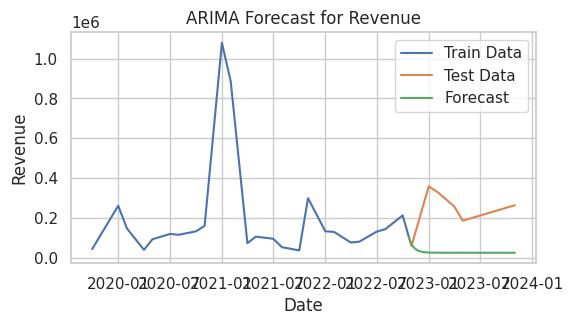

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.85%

--------------------FOR THE PARTNER MARKET: Central and Eastern Europe ----------------------------


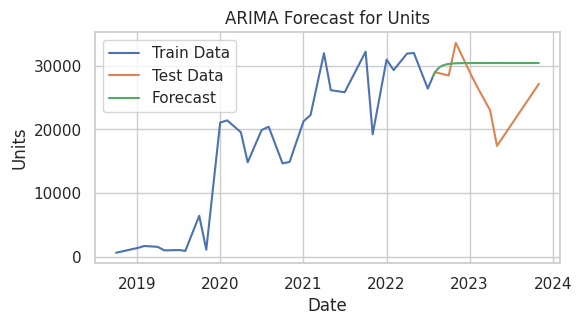

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.23%


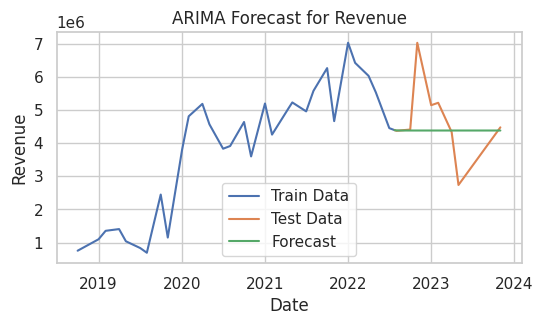

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.18%

--------------------FOR THE PARTNER MARKET: Southern Europe, Middle East and Africa ----------------------------


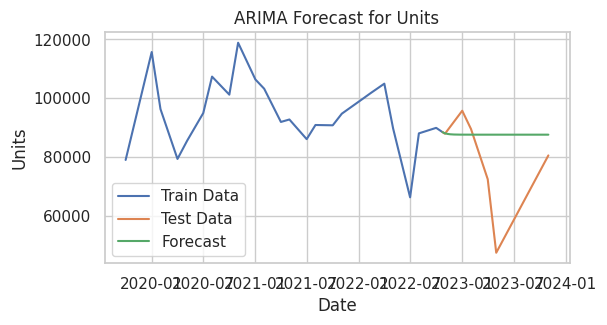

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.26%


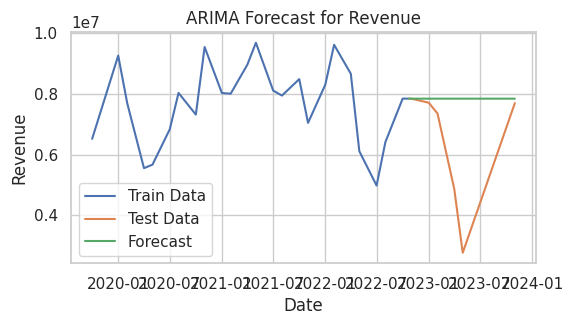

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.45%

--------------------FOR THE PARTNER MARKET: Northwest Europe ----------------------------


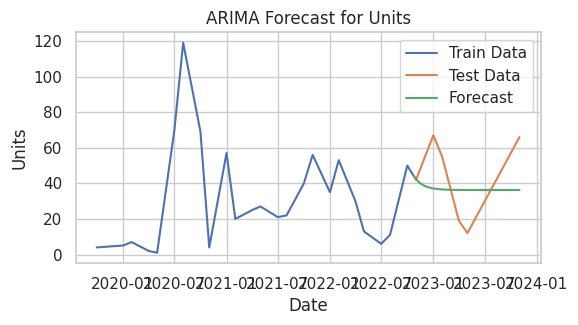

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.45%


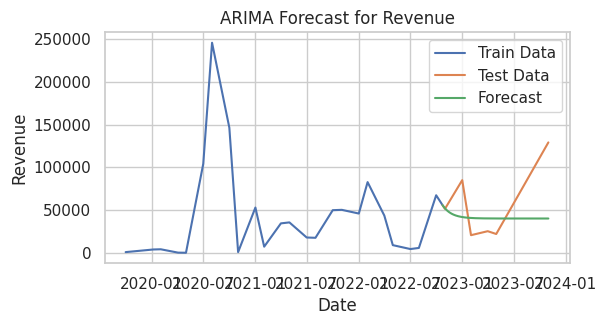

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.48%


In [ ]:
for i in MARKET:
  print('')
  print('--------------------FOR THE PARTNER MARKET:', i, '----------------------------')
  dft = df[df['PARTNER_MARKET'] == i]
  arima_func(dft)

### Time-Series Analysis using LSTM:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

def rnn_func(dataframe):
    # Data preprocessing
    df2 = dataframe[['DATE', 'UNITS', 'REVENUE_USD']]
    df2.set_index('DATE', inplace=True)
    freq = 'D'  # Daily frequency
    df_re = df2.resample(freq).agg({'UNITS': 'sum', 'REVENUE_USD': 'sum'})
    df_re.replace(0, np.nan, inplace=True)
    df_re['UNITS'].interpolate(method='linear', inplace=True)
    df_re['REVENUE_USD'].interpolate(method='linear', inplace=True)

    # Scaling the data for RNN
    scaler_units = MinMaxScaler(feature_range=(0, 1))
    scaler_revenue = MinMaxScaler(feature_range=(0, 1))

    df_re['UNITS'] = scaler_units.fit_transform(df_re[['UNITS']])
    df_re['REVENUE_USD'] = scaler_revenue.fit_transform(df_re[['REVENUE_USD']])

    # Splitting the data into training and testing sets
    train_size = int(0.75 * len(df_re))
    train, test = df_re.iloc[:train_size], df_re.iloc[train_size:]

    def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset) - time_step - 1):
            dataX.append(dataset[i:(i + time_step), 0])
            dataY.append(dataset[i + time_step, 0])
        return np.array(dataX), np.array(dataY)

    time_step = 5
    # Preparing data for LSTM - UNITS
    train_units = train[['UNITS']].values
    test_units = test[['UNITS']].values
    X_train_units, y_train_units = create_dataset(train_units, time_step)
    X_test_units, y_test_units = create_dataset(test_units, time_step)

    # Reshape input to be [samples, time steps, features] for LSTM
    X_train_units = X_train_units.reshape(X_train_units.shape[0], X_train_units.shape[1], 1)
    X_test_units = X_test_units.reshape(X_test_units.shape[0], X_test_units.shape[1], 1)

    # LSTM model for forecasting UNITS
    model_units = Sequential()
    model_units.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model_units.add(LSTM(50, return_sequences=False))
    model_units.add(Dense(25))
    model_units.add(Dense(1))

    model_units.compile(optimizer=Adam(), loss='mean_squared_error')
    model_units.fit(X_train_units, y_train_units, epochs=10, batch_size=32, verbose=1)

    # Forecast for units
    units_forecast = model_units.predict(X_test_units)
    units_forecast = scaler_units.inverse_transform(units_forecast)

    # Prepare actual test data (aligned with the forecast to handle NaNs)
    actual_units_test = scaler_units.inverse_transform(test_units[time_step+1:])

    # Handle NaN values for MAPE calculation (remove any NaNs)
    valid_indices = ~np.isnan(units_forecast) & ~np.isnan(actual_units_test)
    if valid_indices.sum() > 0:
        mape_units = mean_absolute_percentage_error(actual_units_test[valid_indices], units_forecast[valid_indices])
        print(f"Mean Absolute Percentage Error (MAPE) for UNITS: {mape_units:.2f}%")
    else:
        print("Warning: No valid data points for MAPE calculation.")

    # Plotting UNITS (Train, Test, Forecast)
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, scaler_units.inverse_transform(train_units), label='Train Data')
    plt.plot(test.index, scaler_units.inverse_transform(test_units), label='Test Data')
    plt.plot(test.index[time_step+1:], units_forecast, label='Forecast')
    plt.xlabel('Date')
    plt.ylabel('Units')
    plt.title('RNN Forecast for Units')
    plt.legend()
    plt.show()

    # Preparing data for LSTM - REVENUE
    train_revenue = train[['REVENUE_USD']].values
    test_revenue = test[['REVENUE_USD']].values
    X_train_revenue, y_train_revenue = create_dataset(train_revenue, time_step)
    X_test_revenue, y_test_revenue = create_dataset(test_revenue, time_step)

    # Reshape input to be [samples, time steps, features] for LSTM
    X_train_revenue = X_train_revenue.reshape(X_train_revenue.shape[0], X_train_revenue.shape[1], 1)
    X_test_revenue = X_test_revenue.reshape(X_test_revenue.shape[0], X_test_revenue.shape[1], 1)

    # LSTM model for forecasting REVENUE
    model_revenue = Sequential()
    model_revenue.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model_revenue.add(LSTM(50, return_sequences=False))
    model_revenue.add(Dense(25))
    model_revenue.add(Dense(1))

    model_revenue.compile(optimizer=Adam(), loss='mean_squared_error')
    model_revenue.fit(X_train_revenue, y_train_revenue, epochs=10, batch_size=32, verbose=1)

    # Forecast for revenue
    revenue_forecast = model_revenue.predict(X_test_revenue)
    revenue_forecast = scaler_revenue.inverse_transform(revenue_forecast)

    # Prepare actual test data (aligned with the forecast)
    actual_revenue_test = scaler_revenue.inverse_transform(test_revenue[time_step+1:])

    # Handle NaN values for MAPE calculation
    valid_indices_revenue = ~np.isnan(revenue_forecast) & ~np.isnan(actual_revenue_test)
    if valid_indices_revenue.sum() > 0:
        mape_revenue = mean_absolute_percentage_error(actual_revenue_test[valid_indices_revenue], revenue_forecast[valid_indices_revenue])
        print(f"Mean Absolute Percentage Error (MAPE) for REVENUE: {mape_revenue:.2f}%")
    else:
        print("Warning: No valid data points for MAPE calculation.")

    # Plotting REVENUE (Train, Test, Forecast)
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, scaler_revenue.inverse_transform(train_revenue), label='Train Data')
    plt.plot(test.index, scaler_revenue.inverse_transform(test_revenue), label='Test Data')
    plt.plot(test.index[time_step+1:], revenue_forecast, label='Forecast')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.title('RNN Forecast for Revenue')
    plt.legend()
    plt.show()


####BU:


--------------------FOR THE BUSINESS UNIT: Printing Supplies ----------------------------
Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: nan
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: nan
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: nan
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: nan
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: nan
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: nan
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: nan
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: nan
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: nan
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


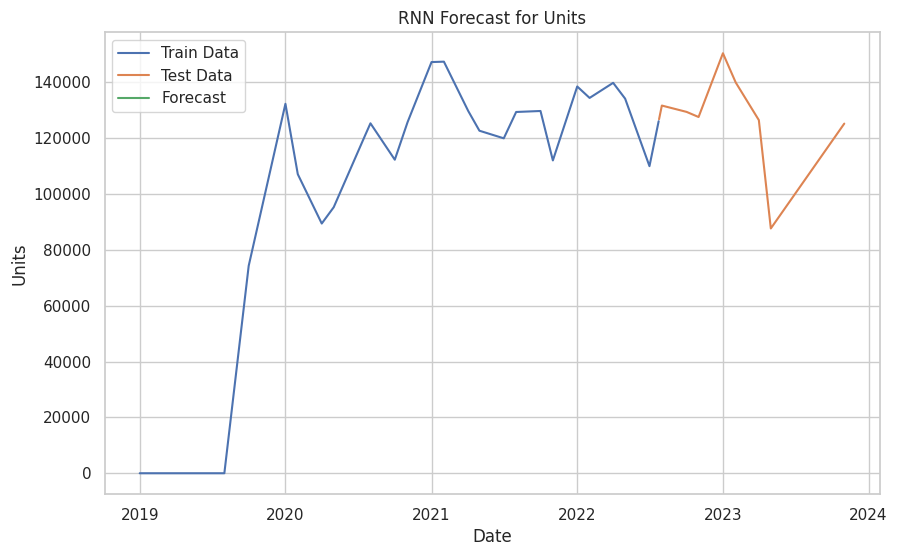

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1467
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.5789e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.0780e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5237e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5498e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6951e-04
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5226e-04
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2648e-04
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.4131e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.01%


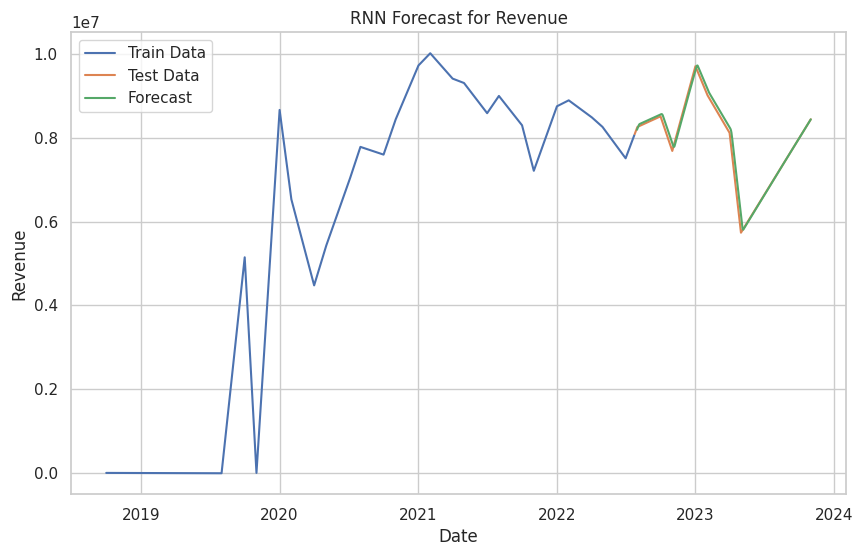


--------------------FOR THE BUSINESS UNIT: Printing HW ----------------------------
Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: nan
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: nan
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: nan
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: nan
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: nan
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: nan
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: nan
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: nan
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: nan
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: nan
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


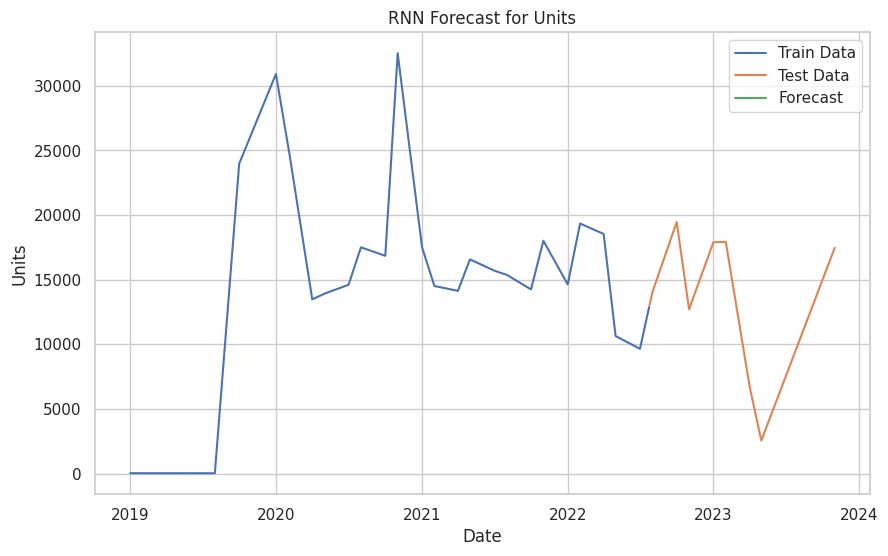

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1038
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0022
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.8739e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8332e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5796e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2442e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5602e-04
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2882e-04
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0267e-04
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8550e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.04%


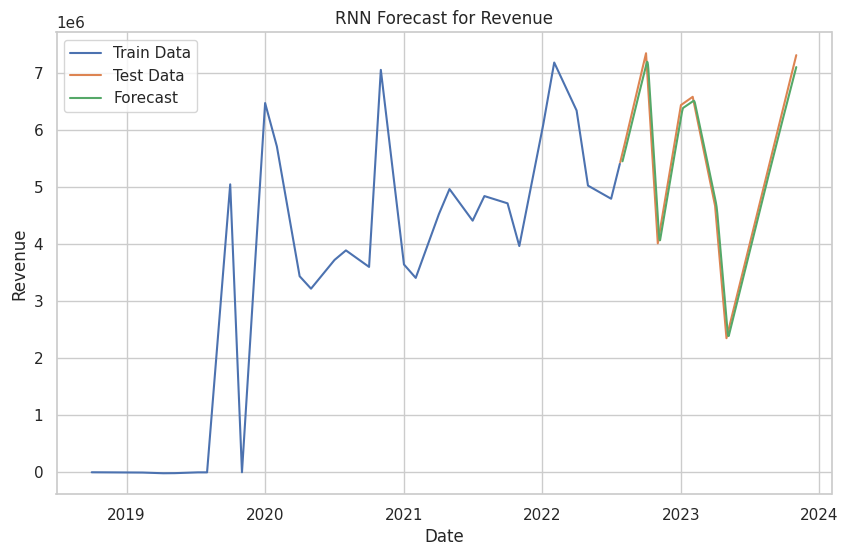


--------------------FOR THE BUSINESS UNIT: Computing ----------------------------
Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0329
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.3243e-04
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.5918e-05
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9309e-05
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.7304e-05
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.1812e-05
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.3102e-05
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.5797e-05
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.5990e-05
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.4015e-05
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Mean Absolute Percentage Error (MAPE) for UNITS: 0.05%


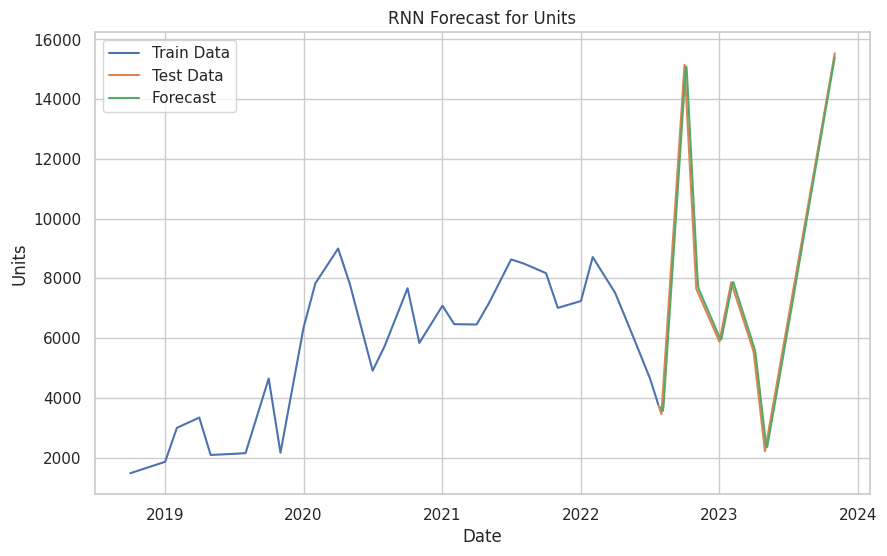

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1033
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3603e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8263e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7567e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.6435e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5792e-04
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5542e-04
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9390e-04
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6910e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.03%


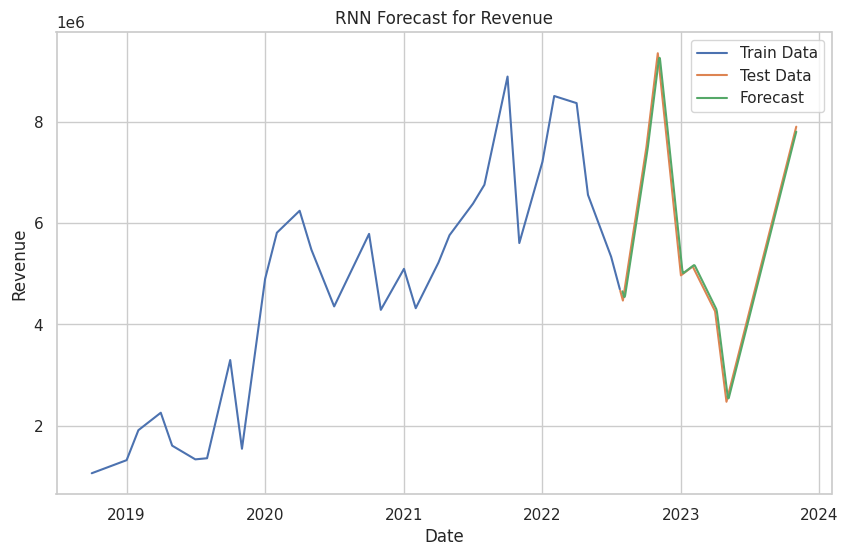

In [ ]:
for i in BU:
  print('')
  print('--------------------FOR THE BUSINESS UNIT:', i, '----------------------------')
  dft = df[df['BUSINESS_UNIT'] == i]
  rnn_func(dft)

####MARKET:


--------------------FOR THE PARTNER MARKET: North America ----------------------------
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1353
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.3134e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.9668e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0991e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0130e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9366e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.2083e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6028e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8125e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Mean Absolute Percentage Error (MAPE) for UNITS: 0.01%


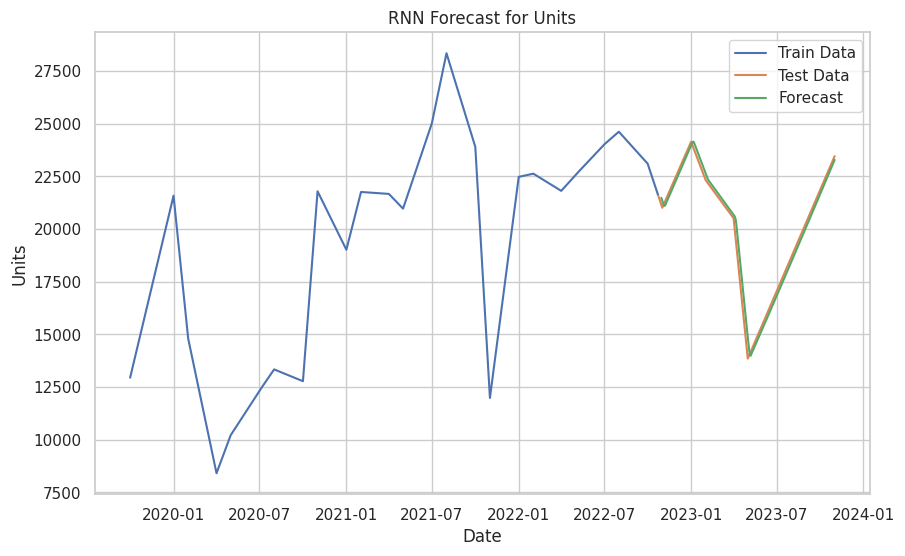

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1680
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0076
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.1921e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.5933e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.8505e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.3727e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1267e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.3778e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.0840e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.2933e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.02%


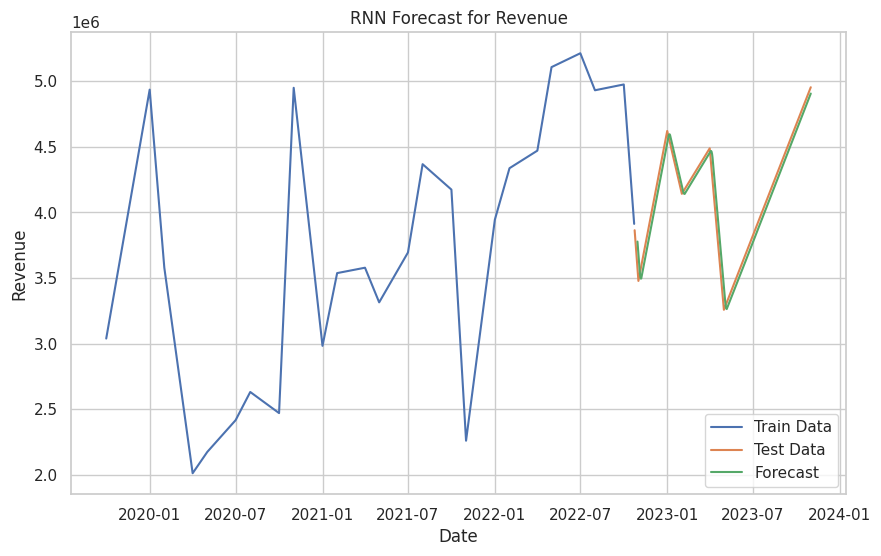


--------------------FOR THE PARTNER MARKET: Latin America ----------------------------
Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0051
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.8644e-05
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4232e-05
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4688e-05
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3944e-05
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.3978e-05
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.3711e-05
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.6513e-05
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5694e-05
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4561e-05
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
Mean Absolute Percentage Error (MAPE) for UNITS: 0.08%


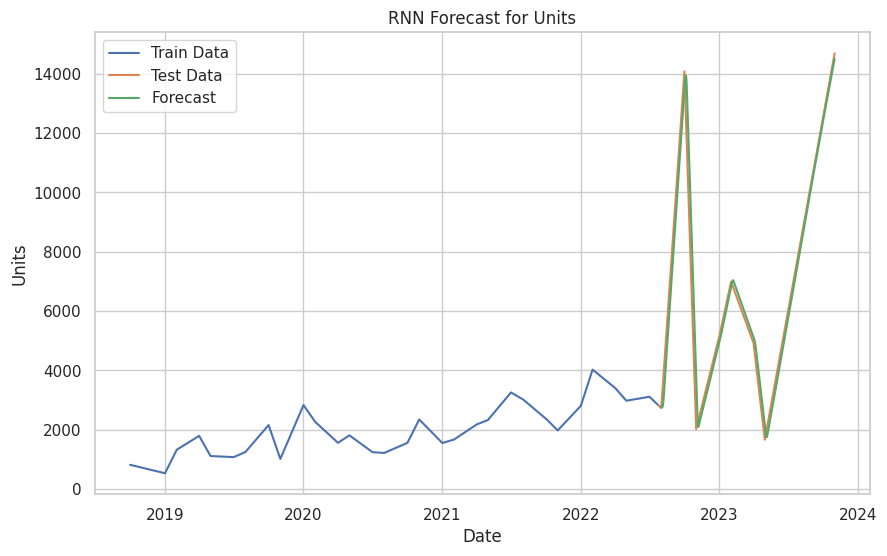

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0246
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.0761e-04
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.3083e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0347e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.5992e-05
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0137e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.2118e-05
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.0916e-04
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.0429e-04
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.3672e-05
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.05%


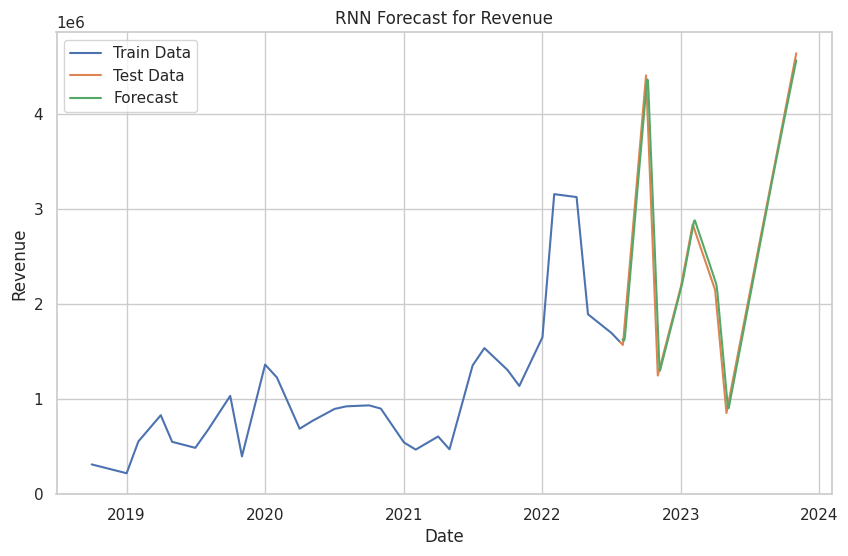


--------------------FOR THE PARTNER MARKET: Greater Asia ----------------------------
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0990
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0029
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5525e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9350e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1776e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.6968e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5451e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4455e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.4520e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9355e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Mean Absolute Percentage Error (MAPE) for UNITS: 0.02%


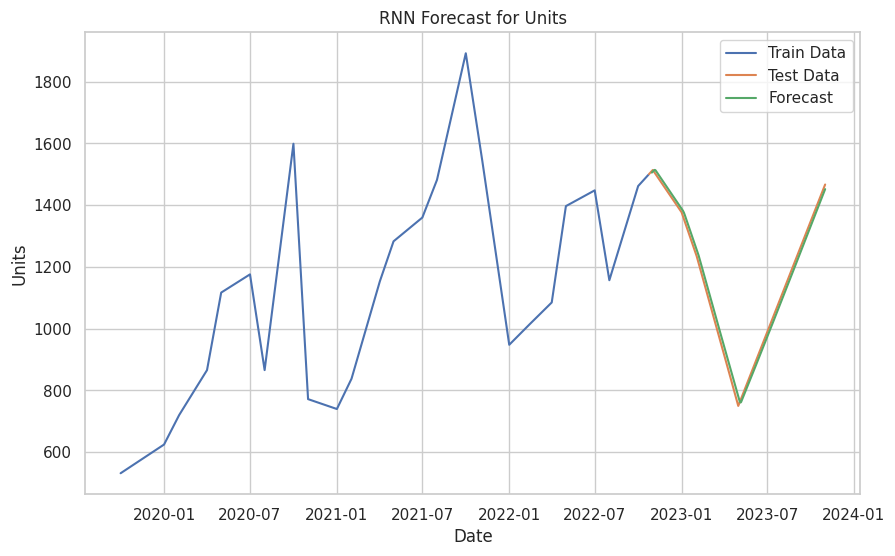

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.1083
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0055
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2691e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.3775e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.9919e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5331e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.1057e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9072e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6839e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.0240e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.02%


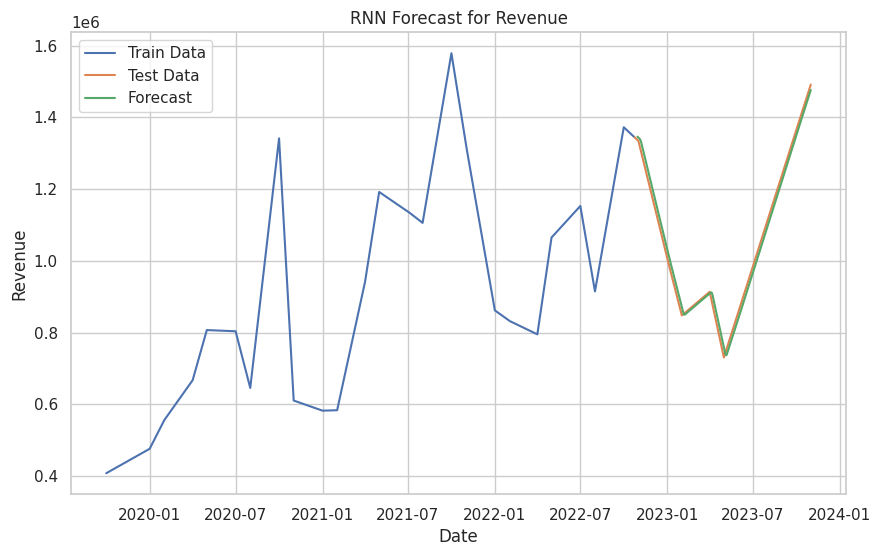


--------------------FOR THE PARTNER MARKET: India ----------------------------
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0490
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1135e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6751e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4733e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.4679e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.1378e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2582e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.5680e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.0209e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
Mean Absolute Percentage Error (MAPE) for UNITS: 0.04%


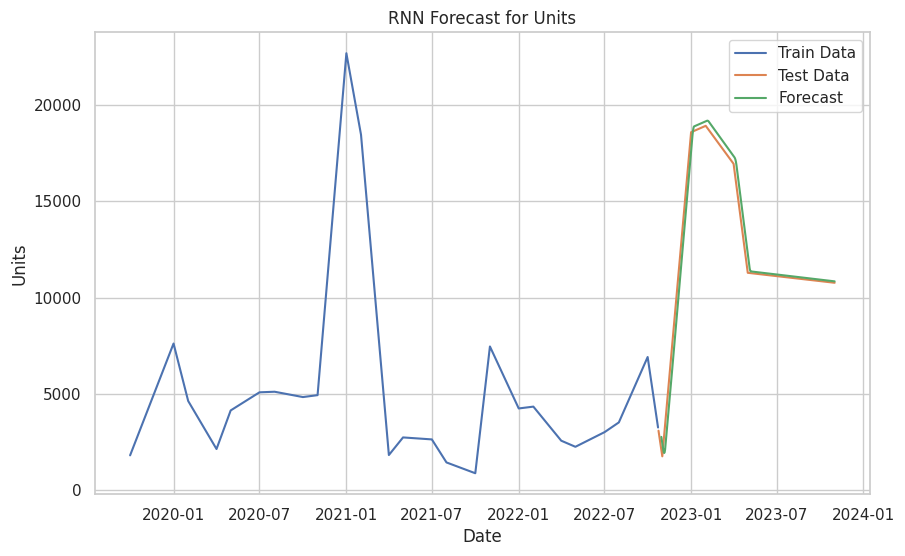

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0198
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.3386e-04
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.2874e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.0901e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.0209e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3588e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5437e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7546e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5943e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6782e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.04%


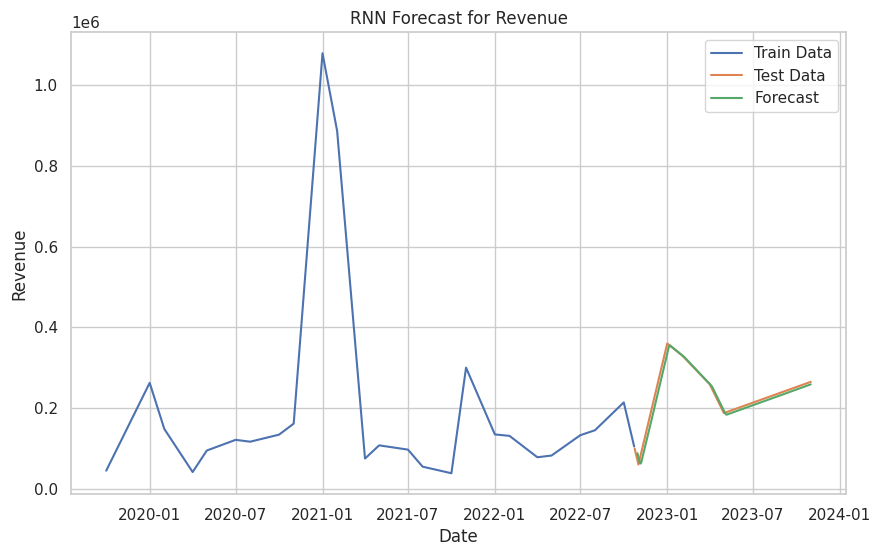


--------------------FOR THE PARTNER MARKET: Central and Eastern Europe ----------------------------
Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1355
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.7225e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6469e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2285e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1158e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8104e-04
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8215e-04
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.6316e-04
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6855e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Mean Absolute Percentage Error (MAPE) for UNITS: 0.01%


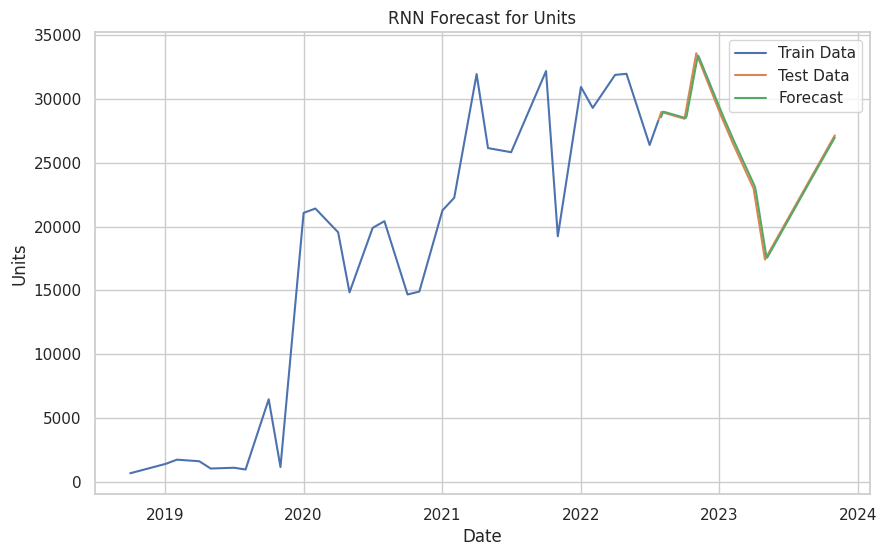

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1094
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0019
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.2134e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9505e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8213e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.6629e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9548e-04
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.4700e-04
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.3842e-04
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.3531e-04
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.02%


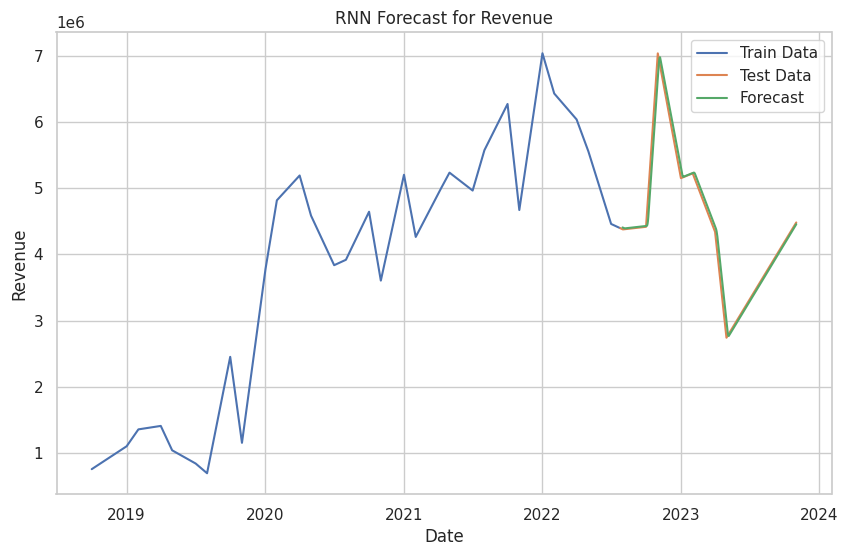


--------------------FOR THE PARTNER MARKET: Southern Europe, Middle East and Africa ----------------------------
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1884
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.6753e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.2864e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3329e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8787e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0805e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0566e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
Mean Absolute Percentage Error (MAPE) for UNITS: 0.03%


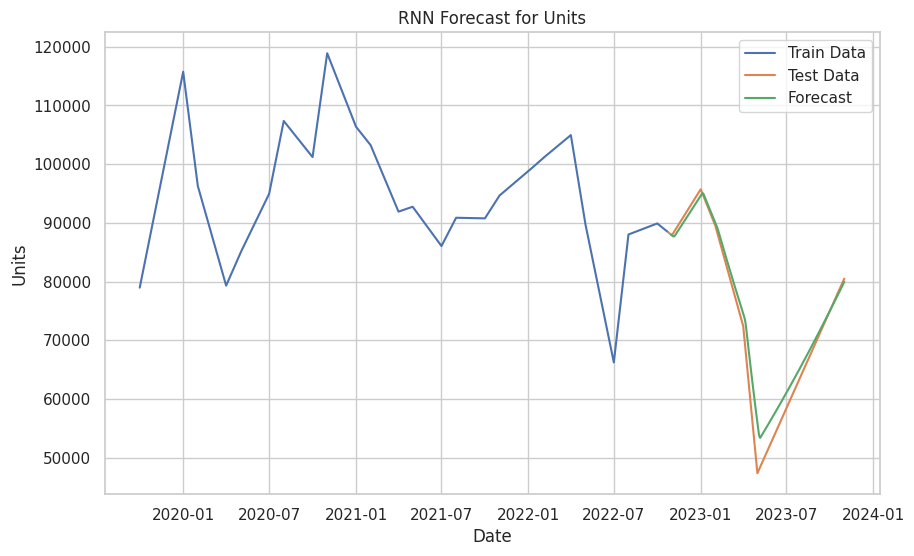

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.2596
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0063
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0028
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.8326e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4792e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6297e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9175e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6365e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6701e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.04%


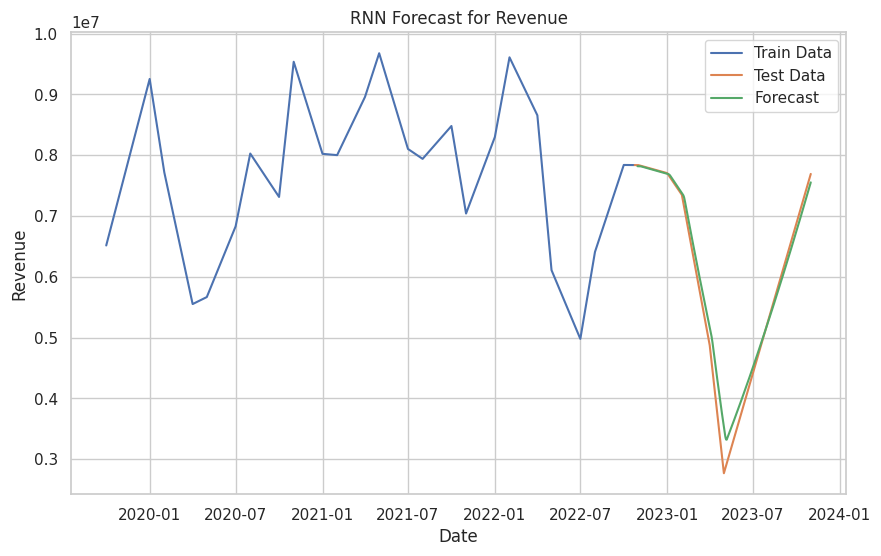


--------------------FOR THE PARTNER MARKET: Northwest Europe ----------------------------
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0577
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.6182e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.7879e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.2865e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3934e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.4062e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.6178e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7424e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5474e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Mean Absolute Percentage Error (MAPE) for UNITS: 0.04%


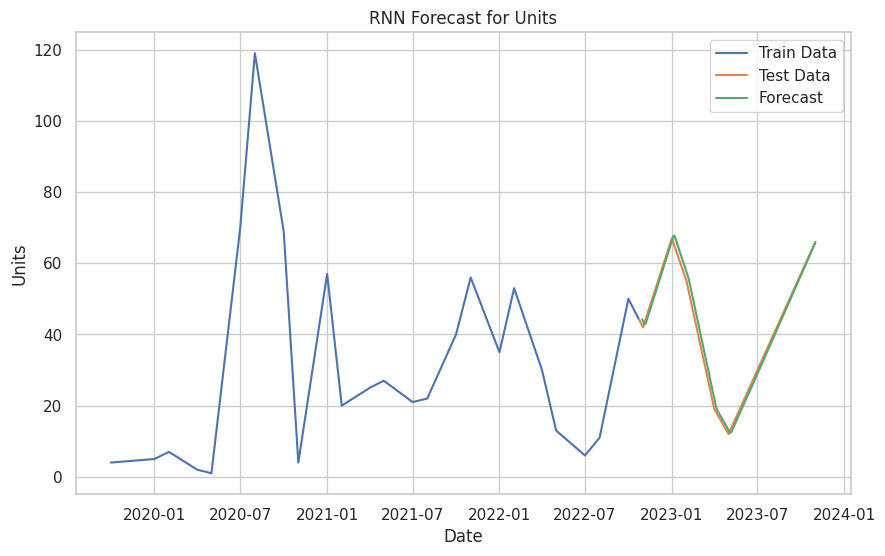

Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0418
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0011
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.8127e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.7131e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.7712e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.4576e-04
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.8899e-04
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.5559e-04
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.3849e-04
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.1858e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Mean Absolute Percentage Error (MAPE) for REVENUE: 0.06%


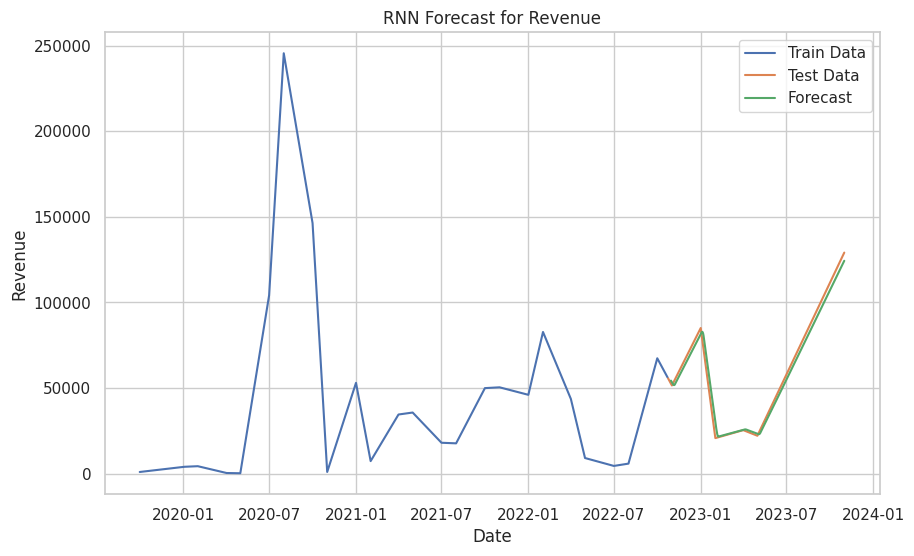

In [ ]:
for i in MARKET:
  print('')
  print('--------------------FOR THE PARTNER MARKET:', i, '----------------------------')
  dft = df[df['PARTNER_MARKET'] == i]
  rnn_func(dft)

### Customer Lifetime Value (CLV) Analysis:

In [ ]:
c_df = df.copy()
c_df

,DATA_FROM,BUSINESS_UNIT,PARTNER_MARKET,PRODUCT_CATEGORY,PARTNER_HQ_NAME,PARTNER_ID,PARTNER_CUSTOMER_ID,PARTNER_LEVEL,IS_OPSI,ONLINE_FLAG,PRODUCT_UNITS,REVENUE_USD,UNITS,DATE,Continent - Product_Unit
0,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13690,Power Services,True,NaN,4.0,391.78,4.0,2020-01-01,North America - Printing Supplies
1,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13438,Power Services,True,N,1.0,70.92,1.0,2023-04-01,North America - Printing Supplies
2,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15330,Power Services,True,N,1.0,238.73,1.0,2022-10-01,North America - Printing Supplies
3,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15322,Power Services,True,N,1.0,200.75,1.0,2023-01-01,North America - Printing Supplies
4,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13521,Power Services,True,NaN,4.0,406.44,4.0,2020-10-01,North America - Printing Supplies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223150,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,67519,Power Services,True,N,3.0,500.36,3.0,2021-05-01,North America - Printing Supplies
223151,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15303,Power Services,True,N,9.0,1612.35,9.0,2022-08-01,North America - Printing Supplies
223152,Sell-To,Printing HW,North America,Office Non Managed,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,26103,Power Services,True,N,1.0,783.41,1.0,2021-08-01,North America - Printing HW
223153,Sell-To,Printing HW,North America,Office Managed,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,WS7038,Power Services,True,NaN,2.0,3672.32,2.0,2020-05-01,North America - Printing HW


#### Average Purchase Value (APV):

In [ ]:
agg_df = c_df.groupby(by=['PARTNER_ID']).agg({'REVENUE_USD': 'sum'})
num_purchases = c_df['PARTNER_ID'].value_counts()
values = []
for index, row in agg_df.iterrows():
  values.append(num_purchases[index])
agg_df['PURCHASES'] = values
agg_df['APV'] = agg_df['REVENUE_USD']/agg_df['PURCHASES']
agg_df

,REVENUE_USD,PURCHASES,APV
PARTNER_ID,,,
0345M99-18534,1.133610e+08,9754,11622.001397
0345M99-19291,9.567433e+06,3501,2732.771395
0345M99-19396,1.030195e+08,2985,34512.389025
0345MDH-10365,1.197623e+08,124007,965.770366
123HSE4-9637,9.824435e+07,51353,1913.118085
123HSGW-6484,1.580754e+07,4847,3261.304357
123HSIB-19739,2.826418e+07,1698,16645.569364
123HSIP-5318,2.310311e+07,2080,11107.262423
345161TR5D,1.161411e+07,2164,5366.962930


#### Average Purchase Frequecy (APF):

In [ ]:
unique_customers = c_df['PARTNER_ID'].nunique()
total_puchases = agg_df['PURCHASES'].sum()
APF = total_puchases/unique_customers
APF

14877.0

#### Average Customer Lifespan (ACL):

In [ ]:
part_uniq = c_df['PARTNER_ID'].unique()
max_dates = []
min_dates = []
for index, row in agg_df.iterrows():
  max_dates.append(c_df.loc[c_df['PARTNER_ID'] == index,'DATE'].max())
  min_dates.append(c_df.loc[c_df['PARTNER_ID'] == index,'DATE'].min())
agg_df['MAX_DATE'] = max_dates
agg_df['MIN_DATE'] = min_dates
#agg_df['CL'] = ((agg_df.MAX_DATE - agg_df.MIN_DATE)/np.timedelta64(1, 'M'))
#agg_df['CL'] = agg_df['CL'].astype(int)
#agg_df

# Calculate the number of days difference first
agg_df['CL'] = (agg_df['MAX_DATE'] - agg_df['MIN_DATE']).dt.days
# Convert days to months by dividing by the average number of days in a month (30.44)
agg_df['CL'] = agg_df['CL'] / 30.44
# Convert the result to integer
agg_df['CL'] = agg_df['CL'].astype(int)
agg_df

,REVENUE_USD,PURCHASES,APV,MAX_DATE,MIN_DATE,CL
PARTNER_ID,,,,,,
0345M99-18534,1.133610e+08,9754,11622.001397,2023-11-01,2018-10-01,61
0345M99-19291,9.567433e+06,3501,2732.771395,2023-11-01,2019-10-01,49
0345M99-19396,1.030195e+08,2985,34512.389025,2023-11-01,2019-10-01,49
0345MDH-10365,1.197623e+08,124007,965.770366,2023-11-01,2019-10-01,49
123HSE4-9637,9.824435e+07,51353,1913.118085,2023-11-01,2019-10-01,49
123HSGW-6484,1.580754e+07,4847,3261.304357,2023-11-01,2019-10-01,49
123HSIB-19739,2.826418e+07,1698,16645.569364,2023-11-01,2018-10-01,61
123HSIP-5318,2.310311e+07,2080,11107.262423,2023-11-01,2018-10-01,61
345161TR5D,1.161411e+07,2164,5366.962930,2023-11-01,2019-10-01,49


In [ ]:
ACL = agg_df['CL'].sum()/unique_customers
ACL

51.4

#### Customer Lifecycle Value (CLV)

In [ ]:
agg_df['CLV'] = agg_df['APV'] * APF * ACL
agg_df

,REVENUE_USD,PURCHASES,APV,MAX_DATE,MIN_DATE,CL,CLV
PARTNER_ID,,,,,,,
0345M99-18534,1.133610e+08,9754,11622.001397,2023-11-01,2018-10-01,61,8.887086e+09
0345M99-19291,9.567433e+06,3501,2732.771395,2023-11-01,2019-10-01,49,2.089690e+09
0345M99-19396,1.030195e+08,2985,34512.389025,2023-11-01,2019-10-01,49,2.639086e+10
0345MDH-10365,1.197623e+08,124007,965.770366,2023-11-01,2019-10-01,49,7.385032e+08
123HSE4-9637,9.824435e+07,51353,1913.118085,2023-11-01,2019-10-01,49,1.462919e+09
123HSGW-6484,1.580754e+07,4847,3261.304357,2023-11-01,2019-10-01,49,2.493847e+09
123HSIB-19739,2.826418e+07,1698,16645.569364,2023-11-01,2018-10-01,61,1.272850e+10
123HSIP-5318,2.310311e+07,2080,11107.262423,2023-11-01,2018-10-01,61,8.493477e+09
345161TR5D,1.161411e+07,2164,5366.962930,2023-11-01,2019-10-01,49,4.103997e+09


In [ ]:
continent = []
prodtype = []
for index, row in agg_df.iterrows():
  continent.append(c_df.loc[c_df['PARTNER_ID'] == index,'PARTNER_MARKET'].iloc[0])
  prodtype.append(c_df.loc[c_df['PARTNER_ID'] == index,'BUSINESS_UNIT'].iloc[0])
agg_df['PARTNER_MARKET'] = continent
agg_df['BUSINESS_UNIT'] = prodtype
agg_df

,REVENUE_USD,PURCHASES,APV,MAX_DATE,MIN_DATE,CL,CLV,PARTNER_MARKET,BUSINESS_UNIT
PARTNER_ID,,,,,,,,,
0345M99-18534,1.133610e+08,9754,11622.001397,2023-11-01,2018-10-01,61,8.887086e+09,Central and Eastern Europe,Printing HW
0345M99-19291,9.567433e+06,3501,2732.771395,2023-11-01,2019-10-01,49,2.089690e+09,Central and Eastern Europe,Printing Supplies
0345M99-19396,1.030195e+08,2985,34512.389025,2023-11-01,2019-10-01,49,2.639086e+10,"Southern Europe, Middle East and Africa",Printing HW
0345MDH-10365,1.197623e+08,124007,965.770366,2023-11-01,2019-10-01,49,7.385032e+08,"Southern Europe, Middle East and Africa",Computing
123HSE4-9637,9.824435e+07,51353,1913.118085,2023-11-01,2019-10-01,49,1.462919e+09,North America,Printing Supplies
123HSGW-6484,1.580754e+07,4847,3261.304357,2023-11-01,2019-10-01,49,2.493847e+09,North America,Printing Supplies
123HSIB-19739,2.826418e+07,1698,16645.569364,2023-11-01,2018-10-01,61,1.272850e+10,Latin America,Printing HW
123HSIP-5318,2.310311e+07,2080,11107.262423,2023-11-01,2018-10-01,61,8.493477e+09,Latin America,Printing Supplies
345161TR5D,1.161411e+07,2164,5366.962930,2023-11-01,2019-10-01,49,4.103997e+09,Greater Asia,Computing


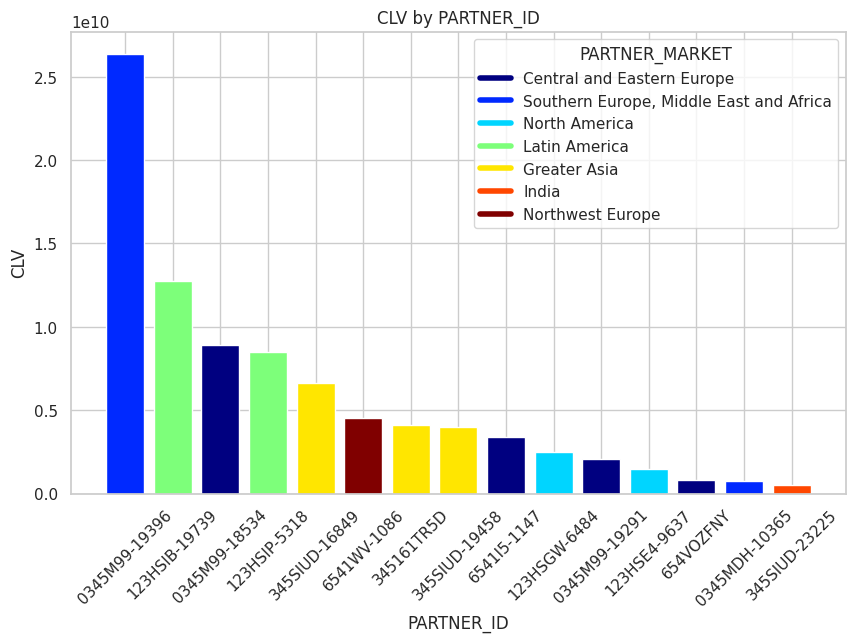

In [ ]:
unique_continents = agg_df['PARTNER_MARKET'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_continents)))

continent_colors = {PARTNER_MARKET: color for PARTNER_MARKET, color in zip(unique_continents, colors)}
agg_df['color'] = agg_df['PARTNER_MARKET'].map(continent_colors)
plt.figure(figsize=(10, 6))
agg_df = agg_df.sort_values(by=['CLV'],ascending=False)
bars = plt.bar(agg_df.index, agg_df['CLV'], color=agg_df['color'])
plt.xlabel('PARTNER_ID')
plt.ylabel('CLV')
plt.title('CLV by PARTNER_ID')
plt.xticks(agg_df.index)
plt.xticks(rotation=45)
legend_labels = [plt.Line2D([0], [0], color=continent_colors[PARTNER_MARKET], lw=4, label=PARTNER_MARKET) for PARTNER_MARKET in unique_continents]
plt.legend(handles=legend_labels, title='PARTNER_MARKET')
plt.show()

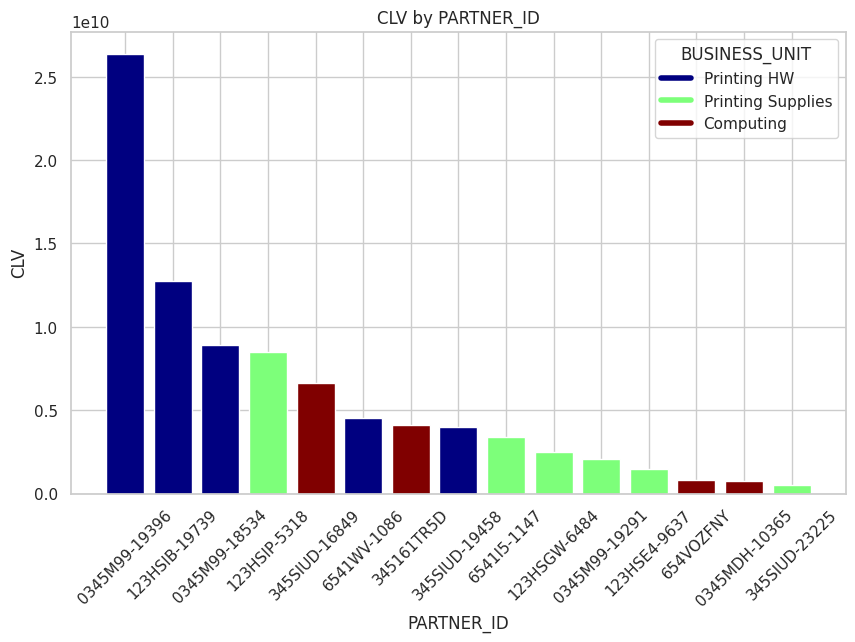

In [ ]:
unique_continents = agg_df['BUSINESS_UNIT'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_continents)))

continent_colors = {BUSINESS_UNIT: color for BUSINESS_UNIT, color in zip(unique_continents, colors)}
agg_df['color'] = agg_df['BUSINESS_UNIT'].map(continent_colors)
plt.figure(figsize=(10, 6))
agg_df = agg_df.sort_values(by=['CLV'],ascending=False)
bars = plt.bar(agg_df.index, agg_df['CLV'], color=agg_df['color'])
plt.xlabel('PARTNER_ID')
plt.ylabel('CLV')
plt.title('CLV by PARTNER_ID')
plt.xticks(agg_df.index)
plt.xticks(rotation=45)
legend_labels = [plt.Line2D([0], [0], color=continent_colors[PARTNER_MARKET], lw=4, label=PARTNER_MARKET) for PARTNER_MARKET in unique_continents]
plt.legend(handles=legend_labels, title='BUSINESS_UNIT')
plt.show()

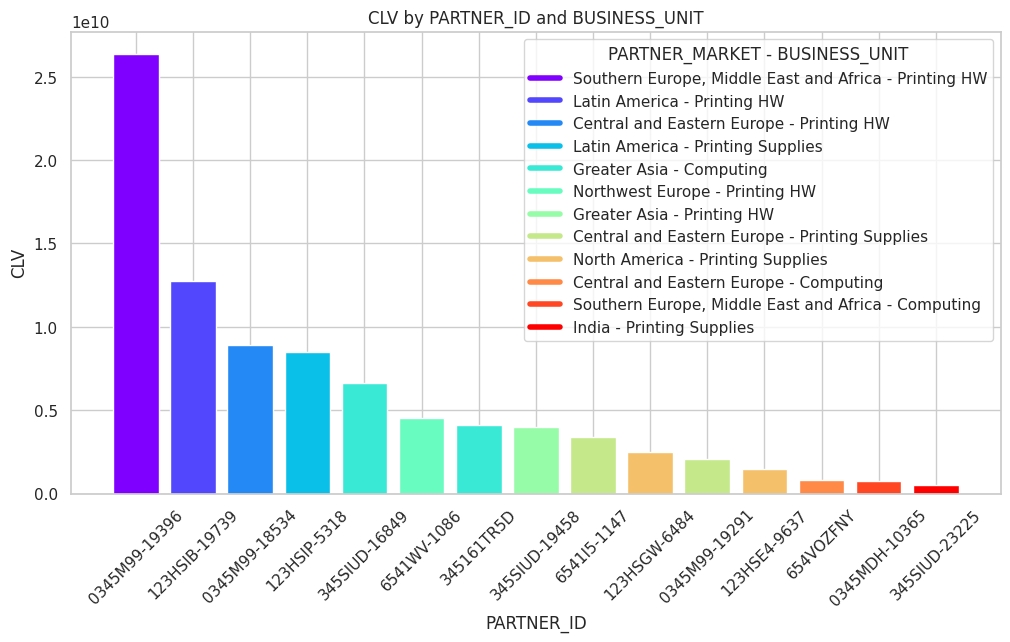

In [ ]:
unique_combinations = agg_df[['PARTNER_MARKET', 'BUSINESS_UNIT']].drop_duplicates()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_combinations)))
combination_colors = {tuple(combination): color for combination, color in zip(unique_combinations.values, colors)}
agg_df['color'] = [combination_colors[tuple(combination)] for combination in agg_df[['PARTNER_MARKET', 'BUSINESS_UNIT']].values]
plt.figure(figsize=(12, 6))
bars = plt.bar(agg_df.index, agg_df['CLV'], color=agg_df['color'])
plt.xlabel('PARTNER_ID')
plt.ylabel('CLV')
plt.title('CLV by PARTNER_ID and BUSINESS_UNIT')
plt.xticks(agg_df.index)
plt.xticks(rotation=45)
legend_labels = [plt.Line2D([0], [0], color=color, lw=4, label=f'{PARTNER_MARKET} - {BUSINESS_UNIT}')
                 for (PARTNER_MARKET, BUSINESS_UNIT), color in combination_colors.items()]
plt.legend(handles=legend_labels, title='PARTNER_MARKET - BUSINESS_UNIT')
plt.show()

### Customer Churn Prediction